In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import statsmodels.api as sm
%matplotlib inline

#### I know my functions are not working, I couldn't figure out what was wrong. And I did not want to leave anything blank, so I decided to keep going and hopefully, I will figure it out before I submit this.

In [159]:
from .. import project_functions
df = project_functions.load_and_process('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report-2021.csv')
df

ImportError: attempted relative import with no known parent package

In [217]:
happiness_df_2021 = pd.read_csv('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report-2021.csv')
happiness_df_2021=happiness_df_2021.rename(columns = {'Ladder score':"Happiness score",'Logged GDP per capita':'Log GDP per capita'})
happiness_df_2021=happiness_df_2021.assign(year='2021')
happiness_df_2021=happiness_df_2021.drop(['upperwhisker',
                        'lowerwhisker',
                        'Standard error of ladder score',
                        'Explained by: Log GDP per capita',
                        'Explained by: Social support',
                        'Explained by: Healthy life expectancy',
                        'Ladder score in Dystopia',
                        'Explained by: Generosity',
                        'Explained by: Freedom to make life choices',
                        'Explained by: Perceptions of corruption',
                        'Dystopia + residual',
                        'Regional indicator'],axis='columns')

happiness_df_2021.head()

,Country name,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2021
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2021
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2021
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2021
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2021


In [4]:
from .. import project_functions
df1 = project_functions.load_and_process('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report.csv')
df1

ImportError: attempted relative import with no known parent package

In [188]:
df2 = (pd.read_csv('/users/annabelle/School/2021/Summer2/data301/group25-project/project-group25-project/data/raw/world-happiness-report.csv')
       .rename(columns = {'Life Ladder':"Happiness score",'Healthy life expectancy at birth':"Healthy life expectancy"})
       .drop(['Positive affect','Negative affect'],axis='columns')
       .loc[lambda x: x['year']>2017]
      )
df2

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
10,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
22,Albania,2018,5.004,9.518,0.684,68.7,0.824,0.009,0.899
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891
...,...,...,...,...,...,...,...,...,...
1932,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832
1933,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831


In [189]:
df2.dropna(subset=['Log GDP per capita'], inplace=True)

In [190]:
df2.fillna(method ='pad')

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
10,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928
11,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
22,Albania,2018,5.004,9.518,0.684,68.7,0.824,0.009,0.899
23,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
24,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891
...,...,...,...,...,...,...,...,...,...
1932,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832
1933,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810
1946,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844
1947,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831


In [191]:
df2 = df2.reset_index(drop=True)
df2

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2018,2.694,7.692,0.508,52.6,0.374,-0.094,0.928
1,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
2,Albania,2018,5.004,9.518,0.684,68.7,0.824,0.009,0.899
3,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
4,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891
...,...,...,...,...,...,...,...,...,...
357,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832
358,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810
359,Zimbabwe,2018,3.616,8.049,0.775,55.6,0.763,-0.068,0.844
360,Zimbabwe,2019,2.694,7.950,0.759,56.2,0.632,-0.064,0.831


In [192]:
def load_year (dataframe ,year):
    dfyear = dataframe[dataframe['year'] == year].reset_index(drop=True)
    return dfyear

In [193]:
happiness_df_2019 = load_year(df2,2019)

In [194]:
happiness_df_2020 = load_year(df2,2020)

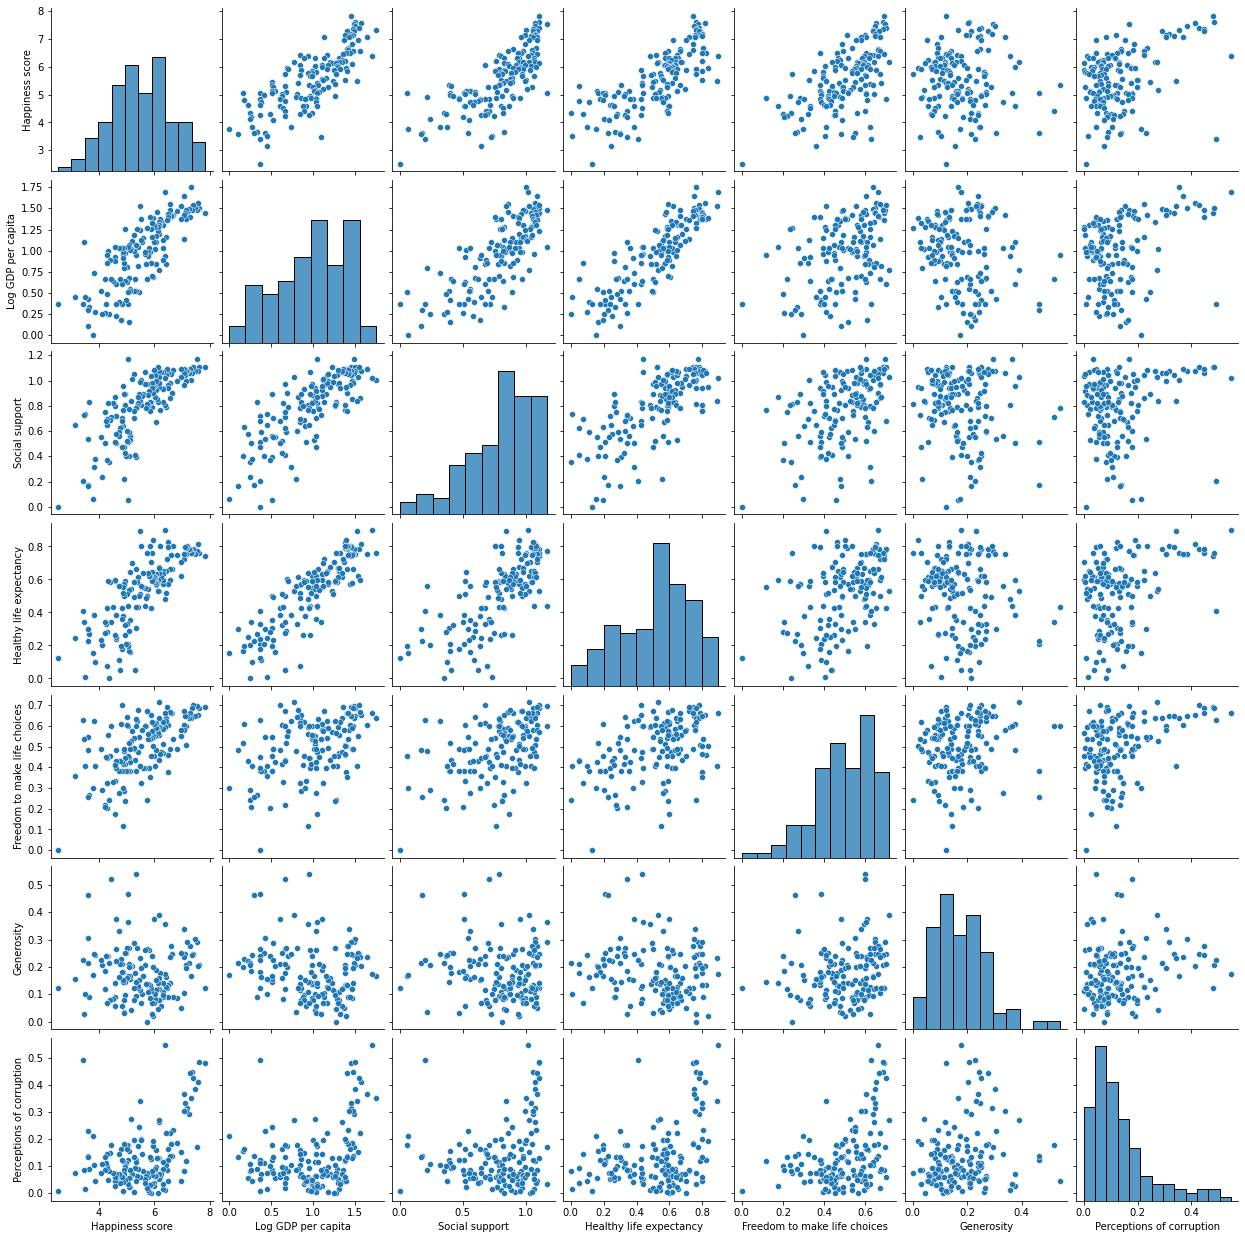

In [12]:
sns.pairplot(happiness_df_2021)

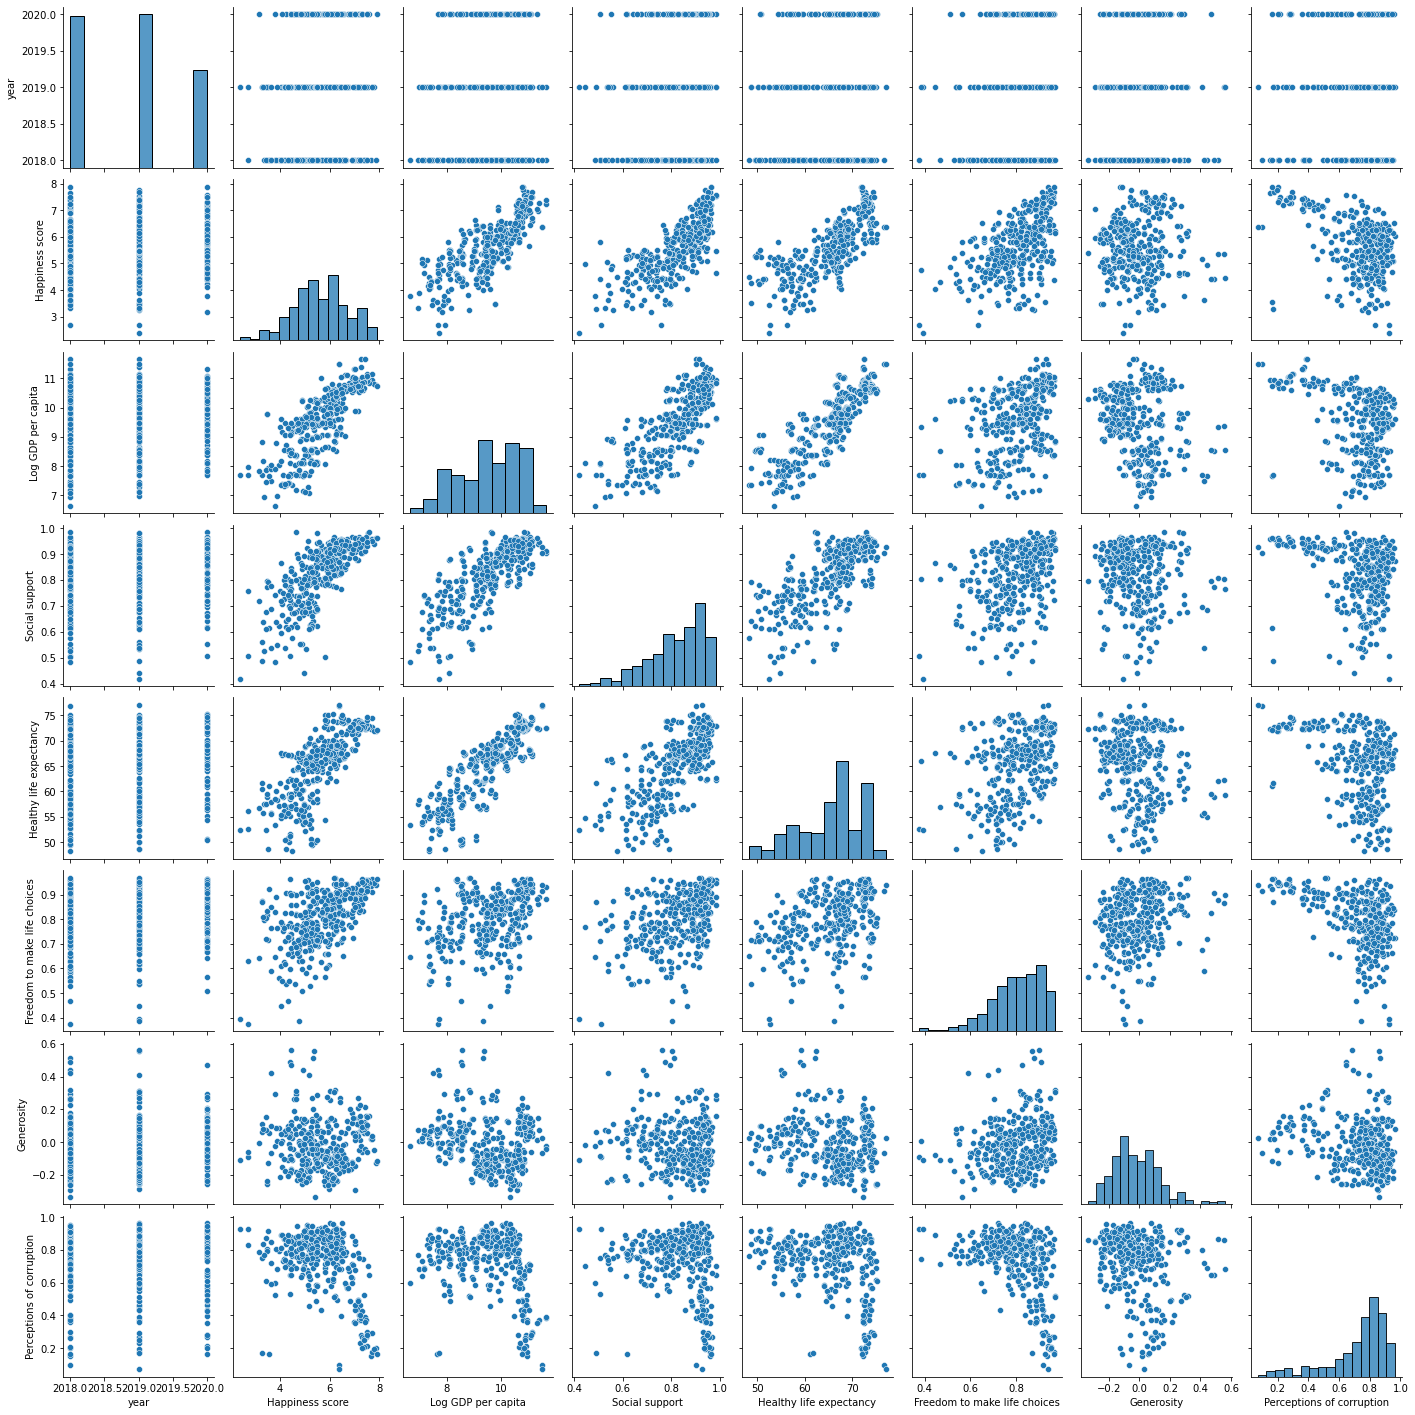

In [13]:
sns.pairplot(df2)

In [201]:
df_clean['Happiness score Mean'] = df_clean["Happiness score"].mean()
df_clean_HSM = df_clean.drop(columns = ['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Log GDP per capita'])
df_clean_HSM.mean()
df_clean_HSM.sort_values(by = ['Happiness score Mean'], ascending = False)
df_clean_HSM['Happiness score diff'] = df_clean_HSM['Happiness score'] - df_clean_HSM['Happiness score Mean']
df_clean_HSM

NameError: name 'df_clean' is not defined

In [199]:
df2['Happiness score Mean'] = df2["Happiness score"].mean()
df2_HSM = df2.drop(columns = ['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Log GDP per capita'])
df2_HSM.mean()
df2_HSM.sort_values(by = ['Happiness score Mean'], ascending = False)
df2_HSM['Happiness score diff'] = df2_HSM['Happiness score'] - df2_HSM['Happiness score Mean']
df2_HSM=df2_HSM.sort_values(by = ['Happiness score diff'], ascending = False)
df2_HSM = df2_HSM.reset_index()
df2_HSM.drop(columns = ['index'], inplace=True)
df2_HSM

,Country name,year,Happiness score,Happiness score Mean,Happiness score diff
0,Finland,2020,7.889,5.629959,2.259041
1,Finland,2018,7.858,5.629959,2.228041
2,Finland,2019,7.780,5.629959,2.150041
3,Switzerland,2019,7.694,5.629959,2.064041
4,Denmark,2019,7.693,5.629959,2.063041
...,...,...,...,...,...
357,India,2019,3.249,5.629959,-2.380959
358,Zimbabwe,2020,3.160,5.629959,-2.469959
359,Zimbabwe,2019,2.694,5.629959,-2.935959
360,Afghanistan,2018,2.694,5.629959,-2.935959


In [200]:
frames = [df_clean_HSM, df2_HSM]
  
result = pd.concat(frames)
result =result.sort_values(by = ['Happiness score diff'], ascending = False)
result = result.reset_index()
result.drop(columns = ['index'], inplace=True)
result

NameError: name 'df_clean_HSM' is not defined

#### Top 3: All Finland (2018, 2020, 2021)

#### Bottom 3: Zimbabwe(2019), Afghanistan(2021) and Afghanistan(2019)

In [197]:
df_clean['Log GDP per capita Mean'] = df_clean["Log GDP per capita"].mean()
df_LGPC_M = happiness_df_2021.drop(columns = ['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Happiness score','Happiness score Mean'])
df_LGPC_M.mean()
df_LGPC_M.sort_values(by = ['Log GDP per capita Mean'], ascending = False)
df_LGPC_M['Log GDP per capita diff'] = df_LGPC_M['Log GDP per capita'] - df_LGPC_M['Log GDP per capita Mean']
df_LGPC_M.head()

NameError: name 'df_clean' is not defined

#### Top 3: Finland, Denmark and Switzerland

#### Bottom 3: Rwanda, Zimbabwe and Afghanistan.

In [ ]:
df2['Log GDP per capita Mean'] = df2["Log GDP per capita"].mean()
df2_LGPC_M = df2.drop(columns = ['Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption','Happiness score','Happiness score Mean'])
df2_LGPC_M.mean()
df2_LGPC_M.sort_values(by = ['Log GDP per capita Mean'], ascending = False)
df2_LGPC_M['Log GDP per capita diff'] = df2_LGPC_M['Log GDP per capita'] - df2_LGPC_M['Log GDP per capita Mean']
df2_LGPC_M=df2_LGPC_M.sort_values(by = ['Log GDP per capita diff'], ascending = False)
df2_LGPC_M = df2_LGPC_M.reset_index()
df2_LGPC_M.drop(columns = ['index'], inplace=True)
df2_LGPC_M.head()

#### Top 3 all in 2019: Luxembourg, Singapore and Ireland. Completely different from 2021.

#### Bottom 3 all from 2019 as well: Mozambique, Niger and Malawi. Completely different from 2021.

In [15]:
df_LGPC_M.plot()
plt.show()

NameError: name 'df_LGPC_M' is not defined

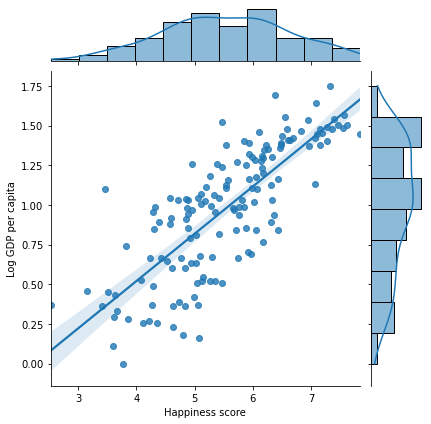

In [16]:
sns.jointplot(x='Happiness score',y='Log GDP per capita', data=happiness_df_2021, kind='reg')

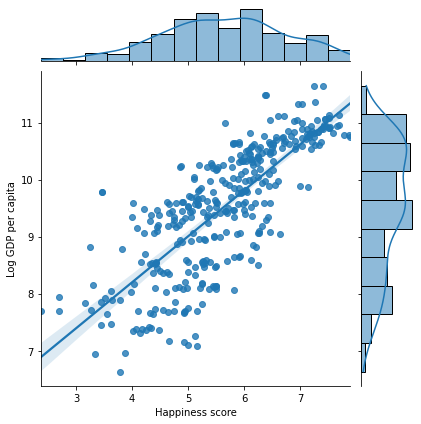

In [17]:
sns.jointplot(x='Happiness score',y='Log GDP per capita', data=df2, kind='reg')

In [196]:
sns.barplot(x='year',y='Happiness score', data=result, hue='year')

NameError: name 'result' is not defined

In [19]:
sns.boxplot(x='year',y='Happiness score', data=result, hue='year')

NameError: name 'result' is not defined

In [20]:
sns.boxplot(x='year',y='Log GDP per capita', data=df2_LGPC_M, hue='year')

NameError: name 'df2_LGPC_M' is not defined

In [202]:
happiness_df_2021

,Country name,Happiness score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,2021
1,Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2021
2,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2021
3,Iceland,7.554,10.878,0.983,73.000,0.955,0.160,0.673,2021
4,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2021
...,...,...,...,...,...,...,...,...,...
144,Lesotho,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,2021
145,Botswana,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,2021
146,Rwanda,3.415,7.676,0.552,61.400,0.897,0.061,0.167,2021
147,Zimbabwe,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,2021


In [203]:
happiness_df_2020

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Albania,2020,5.365,9.497,0.710,69.3,0.754,0.007,0.891
1,Argentina,2020,5.901,9.850,0.897,69.2,0.823,-0.122,0.816
2,Australia,2020,7.137,10.760,0.937,74.2,0.905,0.210,0.491
3,Austria,2020,7.213,10.851,0.925,73.6,0.912,0.011,0.464
4,Bahrain,2020,6.173,10.620,0.848,69.7,0.945,0.132,NaN
...,...,...,...,...,...,...,...,...,...
83,United Kingdom,2020,6.798,10.626,0.929,72.7,0.885,0.203,0.490
84,United States,2020,7.028,11.001,0.937,68.1,0.850,0.034,0.678
85,Uruguay,2020,6.310,9.937,0.921,69.2,0.908,-0.084,0.491
86,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810


In [204]:
happiness_df_2019

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Afghanistan,2019,2.375,7.697,0.420,52.4,0.394,-0.108,0.924
1,Albania,2019,4.995,9.544,0.686,69.0,0.777,-0.099,0.914
2,Algeria,2019,4.745,9.337,0.803,66.1,0.385,0.005,0.741
3,Argentina,2019,6.086,10.000,0.896,69.0,0.817,-0.211,0.830
4,Armenia,2019,5.488,9.522,0.782,67.2,0.844,-0.172,0.583
...,...,...,...,...,...,...,...,...,...
133,Uruguay,2019,6.600,9.979,0.933,69.1,0.903,-0.095,0.599
134,Uzbekistan,2019,6.154,8.853,0.915,65.4,0.970,0.304,0.511
135,Vietnam,2019,5.467,8.992,0.848,68.1,0.952,-0.126,0.788
136,Zambia,2019,3.307,8.155,0.638,55.8,0.811,0.077,0.832


In [205]:
GDP_2019=happiness_df_2019.sort_values(by = ['Log GDP per capita'], ascending = False)
GDP_2019=GDP_2019.reset_index()
GDP_2019.drop(columns = ['index'], inplace=True)
GDP_2019

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Luxembourg,2019,7.404,11.648,0.912,72.6,0.930,-0.045,0.390
1,Singapore,2019,6.378,11.486,0.925,77.1,0.938,0.027,0.070
2,Ireland,2019,7.255,11.371,0.944,72.4,0.892,0.074,0.373
3,Switzerland,2019,7.694,11.136,0.949,74.4,0.913,0.036,0.294
4,United Arab Emirates,2019,6.711,11.114,0.862,67.3,0.911,0.129,NaN
...,...,...,...,...,...,...,...,...,...
133,Chad,2019,4.251,7.365,0.640,48.7,0.537,0.055,0.832
134,Liberia,2019,5.121,7.264,0.712,56.9,0.706,0.051,0.828
135,Mozambique,2019,4.932,7.155,0.742,55.2,0.870,0.073,0.682
136,Niger,2019,5.004,7.106,0.677,54.0,0.831,0.026,0.729


In [206]:
Top10_GDP_2019 = GDP_2019.head(10)
Top10_GDP_2019

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Luxembourg,2019,7.404,11.648,0.912,72.6,0.930,-0.045,0.390
1,Singapore,2019,6.378,11.486,0.925,77.1,0.938,0.027,0.070
2,Ireland,2019,7.255,11.371,0.944,72.4,0.892,0.074,0.373
3,Switzerland,2019,7.694,11.136,0.949,74.4,0.913,0.036,0.294
4,United Arab Emirates,2019,6.711,11.114,0.862,67.3,0.911,0.129,NaN
5,Norway,2019,7.442,11.061,0.942,73.3,0.954,0.111,0.271
6,United States,2019,6.944,11.043,0.917,68.2,0.836,0.144,0.707
7,Hong Kong S.A.R. of China,2019,5.659,11.000,0.856,NaN,0.727,0.067,0.432
8,Denmark,2019,7.693,10.954,0.958,72.7,0.963,0.020,0.174
9,Netherlands,2019,7.425,10.953,0.941,72.4,0.886,0.213,0.360


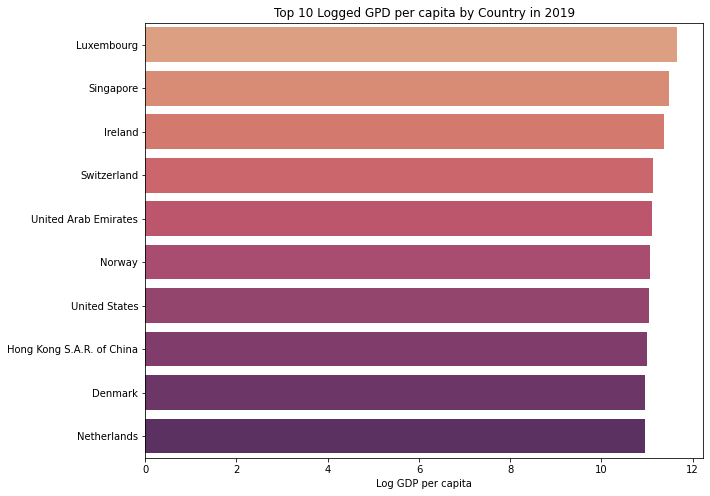

In [207]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Top10_GDP_2019, palette=sns.color_palette("flare",10))
plt.title('Top 10 Logged GPD per capita by Country in 2019')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

In [208]:
Lowest10_GDP_2019 = GDP_2019.tail(10)
Lowest10_GDP_2019

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
128,Burkina Faso,2019,4.741,7.691,0.683,54.4,0.678,-0.004,0.729
129,Uganda,2019,4.948,7.688,0.805,56.1,0.704,0.139,0.826
130,Sierra Leone,2019,3.447,7.449,0.611,52.4,0.718,0.074,0.874
131,Madagascar,2019,4.339,7.406,0.701,59.5,0.550,-0.012,0.720
132,Togo,2019,4.179,7.375,0.539,55.1,0.617,0.065,0.737
133,Chad,2019,4.251,7.365,0.640,48.7,0.537,0.055,0.832
134,Liberia,2019,5.121,7.264,0.712,56.9,0.706,0.051,0.828
135,Mozambique,2019,4.932,7.155,0.742,55.2,0.870,0.073,0.682
136,Niger,2019,5.004,7.106,0.677,54.0,0.831,0.026,0.729
137,Malawi,2019,3.869,6.966,0.549,58.3,0.765,0.004,0.680


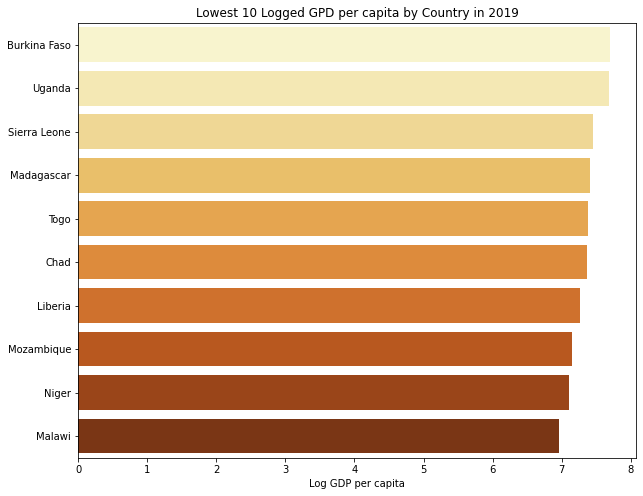

In [209]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Lowest10_GDP_2019, palette=sns.color_palette("YlOrBr",10))
plt.title('Lowest 10 Logged GPD per capita by Country in 2019')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

In [210]:
GDP_2020=happiness_df_2020.sort_values(by = ['Log GDP per capita'], ascending = False)
GDP_2020=GDP_2020.reset_index()
GDP_2020.drop(columns = ['index'], inplace=True)
GDP_2020

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Ireland,2020,7.035,11.323,0.960,72.5,0.882,0.014,0.356
1,Switzerland,2020,7.508,11.081,0.946,74.7,0.917,-0.064,0.280
2,United Arab Emirates,2020,6.458,11.053,0.827,67.5,0.942,0.060,NaN
3,Norway,2020,7.290,11.042,0.956,73.4,0.965,0.075,0.271
4,United States,2020,7.028,11.001,0.937,68.1,0.850,0.034,0.678
...,...,...,...,...,...,...,...,...,...
83,Tajikistan,2020,5.373,8.080,0.790,64.7,NaN,-0.040,0.550
84,Tanzania,2020,3.786,7.881,0.740,58.5,0.830,0.295,0.521
85,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789
86,Ethiopia,2020,4.549,7.711,0.823,59.5,0.769,0.188,0.784


In [211]:
Top10_GDP_2020 = GDP_2020.head(10)
Top10_GDP_2020

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,Ireland,2020,7.035,11.323,0.960,72.5,0.882,0.014,0.356
1,Switzerland,2020,7.508,11.081,0.946,74.7,0.917,-0.064,0.280
2,United Arab Emirates,2020,6.458,11.053,0.827,67.5,0.942,0.060,NaN
3,Norway,2020,7.290,11.042,0.956,73.4,0.965,0.075,0.271
4,United States,2020,7.028,11.001,0.937,68.1,0.850,0.034,0.678
5,Denmark,2020,7.515,10.910,0.947,73.0,0.938,0.052,0.214
6,Netherlands,2020,7.504,10.901,0.944,72.5,0.935,0.151,0.281
7,Austria,2020,7.213,10.851,0.925,73.6,0.912,0.011,0.464
8,Sweden,2020,7.314,10.838,0.936,72.8,0.951,0.091,0.203
9,Germany,2020,7.312,10.833,0.905,72.8,0.864,-0.060,0.424


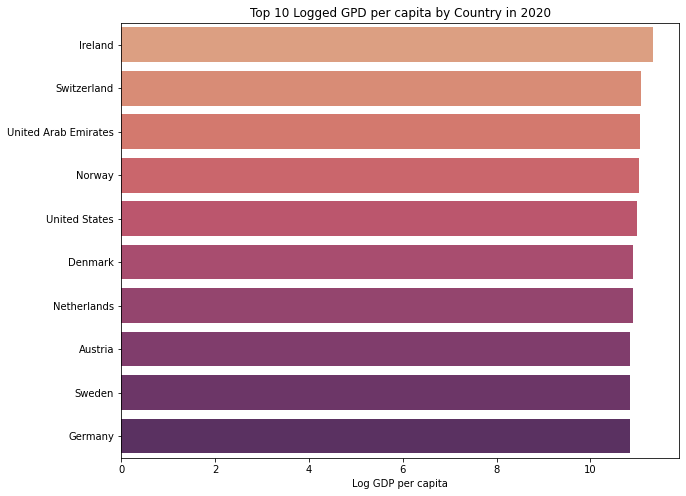

In [212]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Top10_GDP_2020, palette=sns.color_palette("flare",10))
plt.title('Top 10 Logged GPD per capita by Country in 2020')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

In [213]:
Lowest10_GDP_2020 = GDP_2020.tail(10)
Lowest10_GDP_2020

,Country name,year,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
78,Kenya,2020,4.547,8.365,0.674,61.3,0.702,0.260,0.837
79,Cambodia,2020,4.377,8.362,0.724,62.4,0.963,0.052,0.863
80,Cameroon,2020,5.241,8.175,0.720,54.3,0.675,0.049,0.837
81,Zambia,2020,4.838,8.117,0.767,56.3,0.750,0.056,0.810
82,Benin,2020,4.408,8.102,0.507,55.1,0.783,-0.083,0.532
83,Tajikistan,2020,5.373,8.080,0.790,64.7,NaN,-0.040,0.550
84,Tanzania,2020,3.786,7.881,0.740,58.5,0.830,0.295,0.521
85,Zimbabwe,2020,3.160,7.829,0.717,56.8,0.643,-0.009,0.789
86,Ethiopia,2020,4.549,7.711,0.823,59.5,0.769,0.188,0.784
87,Uganda,2020,4.641,7.684,0.800,56.5,0.687,0.147,0.878


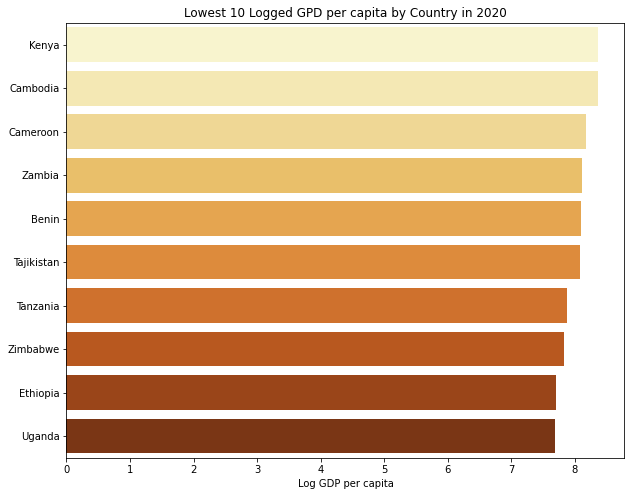

In [214]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Lowest10_GDP_2020, palette=sns.color_palette("YlOrBr",10))
plt.title('Lowest 10 Logged GPD per capita by Country in 2020')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

In [218]:
GDP_2021=happiness_df_2021.sort_values(by = ['Log GDP per capita'], ascending = False)
GDP_2021=GDP_2021.reset_index()
GDP_2021.drop(columns = ['index'], inplace=True)
GDP_2021

,Country name,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Luxembourg,7.324,11.647,0.908,72.600,0.907,-0.034,0.386,2021
1,Singapore,6.377,11.488,0.915,76.953,0.927,-0.018,0.082,2021
2,Ireland,7.085,11.342,0.947,72.400,0.879,0.077,0.363,2021
3,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2021
4,United Arab Emirates,6.561,11.085,0.844,67.333,0.932,0.074,0.589,2021
...,...,...,...,...,...,...,...,...,...
144,Liberia,4.625,7.288,0.720,56.498,0.735,0.050,0.850,2021
145,Mozambique,4.794,7.158,0.744,54.706,0.882,0.061,0.684,2021
146,Niger,5.074,7.098,0.641,53.780,0.806,0.018,0.693,2021
147,Malawi,3.600,6.958,0.537,57.948,0.780,0.038,0.729,2021


In [219]:
Top10_GDP_2021 = GDP_2021.head(10)
Top10_GDP_2021

,Country name,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Luxembourg,7.324,11.647,0.908,72.600,0.907,-0.034,0.386,2021
1,Singapore,6.377,11.488,0.915,76.953,0.927,-0.018,0.082,2021
2,Ireland,7.085,11.342,0.947,72.400,0.879,0.077,0.363,2021
3,Switzerland,7.571,11.117,0.942,74.400,0.919,0.025,0.292,2021
4,United Arab Emirates,6.561,11.085,0.844,67.333,0.932,0.074,0.589,2021
5,Norway,7.392,11.053,0.954,73.300,0.960,0.093,0.270,2021
6,United States,6.951,11.023,0.920,68.200,0.837,0.098,0.698,2021
7,Hong Kong S.A.R. of China,5.477,11.000,0.836,76.820,0.717,0.067,0.403,2021
8,Denmark,7.620,10.933,0.954,72.700,0.946,0.030,0.179,2021
9,Netherlands,7.464,10.932,0.942,72.400,0.913,0.175,0.338,2021


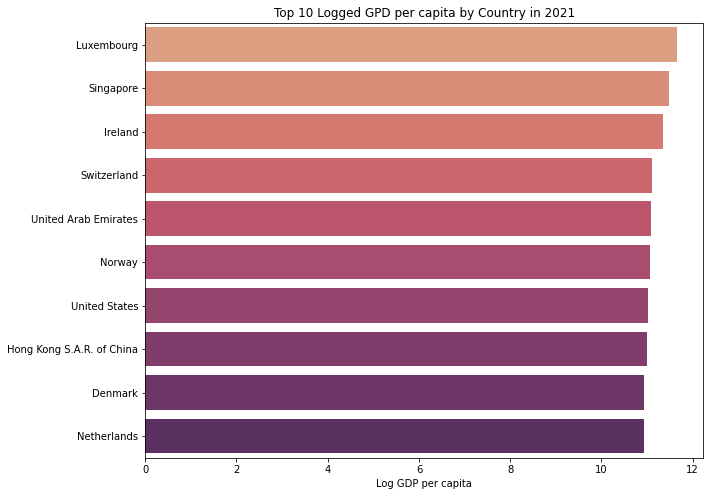

In [220]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Top10_GDP_2021, palette=sns.color_palette("flare",10))
plt.title('Top 10 Logged GPD per capita by Country in 2021')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

In [221]:
GDP_2021.drop(GDP_2021.index[-1], inplace=True)
Lowest10_GDP_2021 = GDP_2021.tail(10)
Lowest10_GDP_2021

,Country name,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
138,Yemen,3.658,7.578,0.832,57.122,0.602,-0.147,0.800,2021
139,Haiti,3.615,7.477,0.540,55.700,0.593,0.422,0.721,2021
140,Sierra Leone,3.849,7.434,0.630,51.651,0.717,0.084,0.866,2021
141,Madagascar,4.208,7.396,0.686,59.305,0.552,-0.005,0.803,2021
142,Chad,4.355,7.364,0.619,48.478,0.579,0.041,0.807,2021
143,Togo,4.107,7.362,0.569,54.914,0.619,0.032,0.772,2021
144,Liberia,4.625,7.288,0.720,56.498,0.735,0.050,0.850,2021
145,Mozambique,4.794,7.158,0.744,54.706,0.882,0.061,0.684,2021
146,Niger,5.074,7.098,0.641,53.780,0.806,0.018,0.693,2021
147,Malawi,3.600,6.958,0.537,57.948,0.780,0.038,0.729,2021


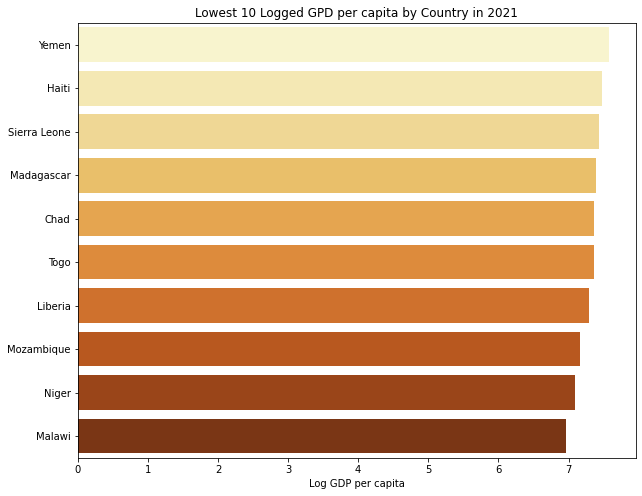

In [222]:
plt.figure(figsize=(10,8))
ax = sns.barplot(y="Country name", x="Log GDP per capita", data=Lowest10_GDP_2021, palette=sns.color_palette("YlOrBr",10))
plt.title('Lowest 10 Logged GPD per capita by Country in 2021')
ax.set(xlabel='Log GDP per capita', ylabel='')
plt.show()

In [223]:
Happiness_2019=happiness_df_2019.sort_values(by = ['Happiness score'], ascending = False)
Happiness_2019=Happiness_2019.reset_index()
Happiness_2019.drop(columns = ['index'], inplace=True)

In [224]:
Top10_Happiness_2019 = Happiness_2019.head(10)

In [225]:
Lowest10_Happiness_2019 = Happiness_2019.tail(10)

In [226]:
Happiness_2020=happiness_df_2020.sort_values(by = ['Happiness score'], ascending = False)
Happiness_2020=Happiness_2020.reset_index()
Happiness_2020.drop(columns = ['index'], inplace=True)

In [227]:
Top10_Happiness_2020 = Happiness_2020.head(10)

In [228]:
Lowest10_Happiness_2020 = Happiness_2020.tail(10)

In [229]:
Happiness_2021=happiness_df_2021.sort_values(by = ['Happiness score'], ascending = False)
Happiness_2021=Happiness_2021.reset_index()
Happiness_2021.drop(columns = ['index'], inplace=True)

In [230]:
Top10_Happiness_2021 = Happiness_2021.head(10)

In [231]:
Lowest10_Happiness_2021 = Happiness_2021.tail(10)

In [233]:
frames= [happiness_df_2021,happiness_df_2020,happiness_df_2019]
Combined_df = pd.concat(frames)

,Country name,Happiness score,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,year
0,Finland,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,2021
1,Denmark,7.620,10.933,0.954,72.7,0.946,0.030,0.179,2021
2,Switzerland,7.571,11.117,0.942,74.4,0.919,0.025,0.292,2021
3,Iceland,7.554,10.878,0.983,73.0,0.955,0.160,0.673,2021
4,Netherlands,7.464,10.932,0.942,72.4,0.913,0.175,0.338,2021
...,...,...,...,...,...,...,...,...,...
133,Uruguay,6.600,9.979,0.933,69.1,0.903,-0.095,0.599,2019
134,Uzbekistan,6.154,8.853,0.915,65.4,0.970,0.304,0.511,2019
135,Vietnam,5.467,8.992,0.848,68.1,0.952,-0.126,0.788,2019
136,Zambia,3.307,8.155,0.638,55.8,0.811,0.077,0.832,2019


In [238]:
Low= [Lowest10_Happiness_2021,Lowest10_Happiness_2020,Lowest10_Happiness_2019]
Combined_Lowest_Happiness = pd.concat(Low)

In [239]:
Top= [Top10_Happiness_2021,Top10_Happiness_2020,Top10_Happiness_2019]
Combined_Top_Happiness = pd.concat(Top)

In [240]:
Low_GDP= [Lowest10_GDP_2021,Lowest10_GDP_2020,Lowest10_GDP_2019]
Combined_Lowest_GDP = pd.concat(Low_GDP)

In [241]:
Top_GDP= [Top10_GDP_2021,Top10_GDP_2020,Top10_GDP_2019]
Combined_Top_GDP = pd.concat(Top_GDP)

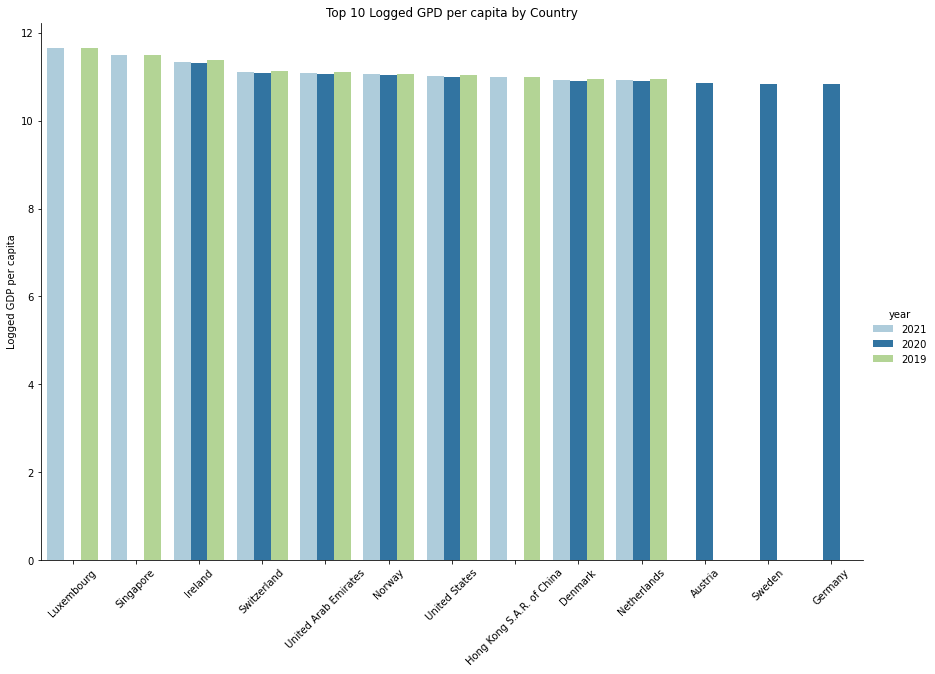

In [293]:
ax = sns.catplot(x='Country name', y='Log GDP per capita', hue='year', data=Combined_Top_GDP
            ,kind='bar',height = 8,aspect=1.5,palette=sns.color_palette("Paired"))
plt.xticks(rotation=45)
plt.title('Top 10 Logged GPD per capita by Country')
ax.set(ylabel='Logged GDP per capita', xlabel='')
plt.show()

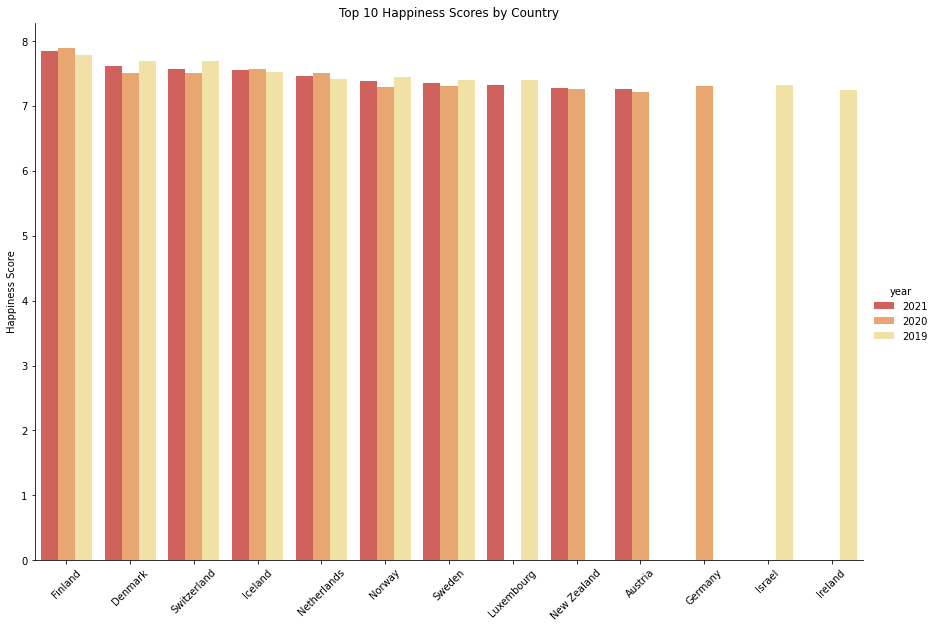

In [298]:
ax = sns.catplot(x='Country name', y='Happiness score', hue='year', data=Combined_Top_Happiness
            ,kind='bar',height = 8,aspect=1.5,palette=sns.color_palette("Spectral"))
plt.xticks(rotation=45)
plt.title('Top 10 Happiness Scores by Country')
ax.set(ylabel='Happiness Score', xlabel='')
plt.show()